In [1]:
#IMPORTING REQUIRED LIBRARIES
from sklearn.model_selection  import train_test_split
from sklearn.neighbors        import KNeighborsClassifier
from sklearn.preprocessing    import MinMaxScaler, LabelEncoder, OneHotEncoder 
from sklearn.model_selection  import KFold
from sklearn.model_selection  import cross_val_score
from sklearn.model_selection  import cross_val_predict
from sklearn                  import metrics
from sklearn.metrics          import precision_score ,confusion_matrix, recall_score ,precision_recall_curve,PrecisionRecallDisplay,f1_score
from sklearn.metrics          import roc_curve , RocCurveDisplay , roc_auc_score
import math
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#IMPORTING DATA
df = pd.read_csv("data.csv" , index_col = 0)
df.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


In [3]:
#columns such as location and country should be categorized in values ranged from 0 to 8 
#while age to be categorized from 0 to 2 which will help us in the next step
#which is: onehot encoding
newLocation = pd.cut(df.location, bins=8 , labels=np.arange(8), right=False)
df['location'] = newLocation

newCountry = pd.cut(df.country, bins=8 , labels=np.arange(8), right=False)
df['country'] = newCountry

newAge = pd.cut(df.age, bins=3, labels=np.arange(3), right=False)
df['age'] = newAge

df.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,6,1,1,2,1,0,14,31,19,12,3,1,8,1
1,5,1,0,1,0,1,14,31,19,12,3,1,0,0
2,7,1,1,1,0,1,14,31,19,12,3,1,13,0
3,6,1,0,1,1,0,14,31,19,12,3,1,0,0
4,6,1,1,1,0,0,14,31,19,12,3,1,0,0


In [4]:
#One-Hot_encoding implementation by converting the data first to label encoding,
#and then transform it to be one hot encoded

#Location encoding
label_encoder = LabelEncoder()
df['location'] = label_encoder.fit_transform(df['location'])
ohe1 = OneHotEncoder(sparse=False)
df[['L0','L1', 'L2' , 'L3' , 'L4' , 'L5' , 'L6' , 'L7'  ]] = ohe1.fit_transform(df['location'].values.reshape(-1,1))

#Country encoding
label_encoderC = LabelEncoder()
df['country'] = label_encoderC.fit_transform(df['country'])
ohe2 = OneHotEncoder(sparse=False)
df[['C0','C1', 'C2' , 'C3' , 'C4' , 'C5' , 'C6' , 'C7' ]] = ohe2.fit_transform(df['country'].values.reshape(-1,1))

#gender encoding
label_encoderG = LabelEncoder()
df['gender'] = label_encoderG.fit_transform(df['gender'])
ohe3 = OneHotEncoder(sparse=False)
df[['Male','Female', 'Undefined']] = ohe3.fit_transform(df['gender'].values.reshape(-1,1))

df = df.drop("location", axis=1)
df = df.drop("country", axis=1)
df = df.drop("gender", axis=1)

df.head()

,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,...,C1,C2,C3,C4,C5,C6,C7,Male,Female,Undefined
0,2,1,0,14,31,19,12,3,1,8,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,1,14,31,19,12,3,1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,0,1,14,31,19,12,3,1,13,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,1,0,14,31,19,12,3,1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,0,0,14,31,19,12,3,1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [5]:
#Reordering the columns
df = df[['age', 'vis_wuhan', 'from_wuhan' , 'symptom1' , 'symptom2' , 'symptom3' , 'symptom4' , 'symptom5' , 'symptom6' , 'diff_sym_hos' ,'L0','L1', 'L2' , 'L3' , 'L4' , 'L5' , 'L6' , 'L7'  , 'C0','C1', 'C2' , 'C3' , 'C4' , 'C5' , 'C6' , 'C7'  ,'Male','Female' ,'Undefined' , 'result']]
X = df.iloc[:,0:29].values
Y = df.iloc[:,29:30].values
df.head()


,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,...,C2,C3,C4,C5,C6,C7,Male,Female,Undefined,result
0,2,1,0,14,31,19,12,3,1,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1,1,0,1,14,31,19,12,3,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,1,0,1,14,31,19,12,3,1,13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,1,1,0,14,31,19,12,3,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,1,0,0,14,31,19,12,3,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [6]:
# Nomralization of data which is a way to improve the accuracy of the models
scaler = MinMaxScaler()
nX = scaler.fit_transform(X)
nY = scaler.fit_transform(Y)

df.head()

,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,...,C2,C3,C4,C5,C6,C7,Male,Female,Undefined,result
0,2,1,0,14,31,19,12,3,1,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1,1,0,1,14,31,19,12,3,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,1,0,1,14,31,19,12,3,1,13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,1,1,0,14,31,19,12,3,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,1,0,0,14,31,19,12,3,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [7]:
#First step of cross-validation: splitting the data into folds, number of folds is recommended to be 10
fold = KFold(n_splits=10, shuffle=False)
print(fold)

KFold(n_splits=10, random_state=None, shuffle=False)


In [8]:
#calculation of mean scores for each K 
k_range = range(1,31)
knn_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, nX, nY.ravel(), cv=10, scoring='accuracy')
    knn_scores.append(scores.mean())
    
for i in range(30):
    print(knn_scores[i])
    print("\n")
    

0.8086206896551724


0.8515771184175355


0.8178561881849774


0.8352980486500936


0.8282812082330928


0.8387864207431169


0.830646885859396


0.8376637262763967


0.8272520716385994


0.8376770916867148


0.8272520716385994


0.8284148623362737


0.823763699545576


0.8563084736701416


0.848182304196739


0.8620823309275595


0.8585805934242183


0.8643945469125903


0.8597433841218927


0.8795108259823576


0.8771718791766908


0.8806602512697139


0.8795108259823576


0.8818230419673885


0.8829858326650628


0.8829858326650628


0.8841486233627374


0.8841486233627374


0.8841486233627374


0.8853114140604117




Text(0, 0.5, 'Accuracy')

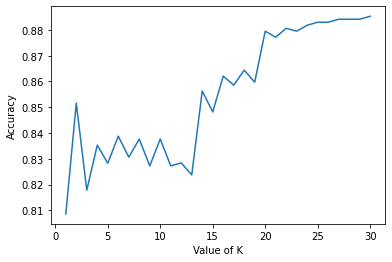

In [9]:
# PLOTTING THE ACCURACY FOR EACH K
# THE POINT AT WHICH THE ACCURACY IS HIGHEST IS THE OPTIMUM K

plt.plot(k_range, knn_scores)
plt.xlabel('Value of K')
plt.ylabel('Accuracy')

In [10]:
#getting accuracy for the best (max) value of K
max_value=max(knn_scores)
bestK=np.where(knn_scores == np.amax(knn_scores))
print(max_value)
bestK


0.8853114140604117


(array([29], dtype=int64),)

In [11]:
knn = KNeighborsClassifier(n_neighbors=(bestK[0][0]))
knn.fit(nX,nY.ravel())

KNeighborsClassifier(n_neighbors=29)

In [12]:
y_pred = cross_val_predict(knn,nX,nY.ravel(), cv = 10)

In [13]:
cm = confusion_matrix(nY, y_pred) #diagonal represent the TRUE prediction, while OFF diagonal represent FALSE prediction

In [14]:
print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[750   5]
 [ 95  13]]

True Positives(TP) =  750

True Negatives(TN) =  13

False Positives(FP) =  5

False Negatives(FN) =  95


# Precision, Recall and AUC calculation/plot 

In [15]:
precisions, recalls, thresholds = precision_recall_curve(nY, y_pred)

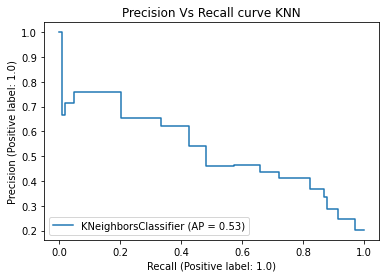

In [16]:
display = PrecisionRecallDisplay.from_estimator(knn,nX,nY)
_ = display.ax_.set_title("Precision Vs Recall curve KNN")

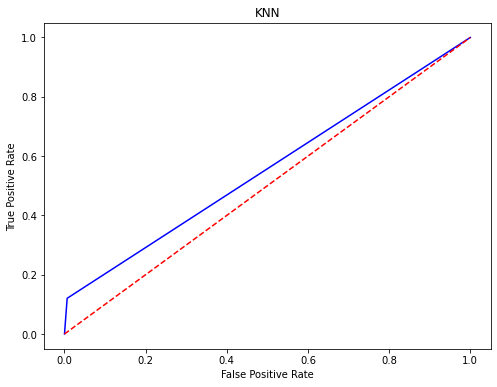

In [17]:
fpr, tpr, threshold = roc_curve(nY, y_pred)
plt.figure(figsize = (8,6))
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.title("KNN")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [20]:
#Area under curve 
#where the larger the AUC, The better performance of the model
AUC = roc_auc_score(nY, y_pred)
AUC

0.5568739269070395

In [21]:
print(precisions)
print(recalls)
print(thresholds)

[0.12514484 0.72222222 1.        ]
[1.         0.12037037 0.        ]
[0. 1.]
